## Importing libraries

In [1]:
## for loading and preprocessing 
import numpy as np
import pandas as pd

## firn data vusyakuzatuib
import matplotlib.pyplot as plt
import seaborn as sns

## spliting dataset
from sklearn.model_selection import train_test_split

## Load regression model
from sklearn.linear_model import LinearRegression

## Loading Data & Creating Copy

In [2]:
data = pd.read_csv("dataset/car_price_prediction.csv")

In [3]:
## Create a deep copy
df = data.copy()

## Data Preview and Understanding

In [4]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [5]:
## view the first rows
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
## check the number of rows and columns
print(f'Total number of rows:{df.shape[0]} -> Total number of columns: {df.shape[1]}')

Total number of rows:19237 -> Total number of columns: 18


In [7]:
## checking type on columns
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [8]:
## get a summary description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [9]:
## checking for missing values
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [10]:
## checking for duplicated values
df.duplicated().sum()

313

In [11]:
print(np.unique(df['Model']))

['09-Mar' '100' '100 NX' ... 'macan S' 'tC' 'xD']


In [12]:
print(np.unique(df['Prod. year']))

[1939 1943 1947 1953 1957 1964 1965 1968 1973 1974 1976 1977 1978 1980
 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


In [13]:
print(np.unique(df['Category']))

['Cabriolet' 'Coupe' 'Goods wagon' 'Hatchback' 'Jeep' 'Limousine'
 'Microbus' 'Minivan' 'Pickup' 'Sedan' 'Universal']


In [14]:
print(np.unique(df['Leather interior']))

['No' 'Yes']


In [15]:
print(np.unique(df['Fuel type']))

['CNG' 'Diesel' 'Hybrid' 'Hydrogen' 'LPG' 'Petrol' 'Plug-in Hybrid']


In [16]:
print(np.unique(df['Engine volume']))

['0' '0.1' '0.2' '0.2 Turbo' '0.3' '0.3 Turbo' '0.4' '0.4 Turbo' '0.5'
 '0.6' '0.6 Turbo' '0.7' '0.7 Turbo' '0.8' '0.8 Turbo' '0.9' '1'
 '1.0 Turbo' '1.1' '1.1 Turbo' '1.2' '1.2 Turbo' '1.3' '1.3 Turbo' '1.4'
 '1.4 Turbo' '1.5' '1.5 Turbo' '1.6' '1.6 Turbo' '1.7' '1.7 Turbo' '1.8'
 '1.8 Turbo' '1.9' '1.9 Turbo' '2' '2.0 Turbo' '2.1' '2.1 Turbo' '2.2'
 '2.2 Turbo' '2.3' '2.3 Turbo' '2.4' '2.4 Turbo' '2.5' '2.5 Turbo' '2.6'
 '2.7' '2.7 Turbo' '2.8' '2.8 Turbo' '2.9' '2.9 Turbo' '20' '3'
 '3.0 Turbo' '3.1' '3.2' '3.2 Turbo' '3.3' '3.4' '3.5' '3.5 Turbo' '3.6'
 '3.6 Turbo' '3.7' '3.7 Turbo' '3.8' '3.9' '4' '4.0 Turbo' '4.2'
 '4.2 Turbo' '4.3' '4.4' '4.4 Turbo' '4.5' '4.5 Turbo' '4.6' '4.6 Turbo'
 '4.7' '4.7 Turbo' '4.8' '4.8 Turbo' '5' '5.0 Turbo' '5.2' '5.3' '5.4'
 '5.4 Turbo' '5.5' '5.5 Turbo' '5.6' '5.7' '5.7 Turbo' '5.8' '5.9' '6'
 '6.2' '6.3' '6.3 Turbo' '6.4' '6.7' '6.8' '7.3']


In [17]:
print(np.unique(df['Mileage']))

['0 km' '1000 km' '10000 km' ... '99999 km' '999999 km' '999999999 km']


In [18]:
print(np.unique(df['Cylinders']))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 12. 14. 16.]


In [19]:
print(np.unique(df['Gear box type']))

['Automatic' 'Manual' 'Tiptronic' 'Variator']


In [20]:
print(np.unique(df['Drive wheels']))

['4x4' 'Front' 'Rear']


In [21]:
print(np.unique(df['Doors']))

['02-Mar' '04-May' '>5']


In [22]:
print(np.unique(df['Wheel']))

['Left wheel' 'Right-hand drive']


In [23]:
print(np.unique(df['Color']))

['Beige' 'Black' 'Blue' 'Brown' 'Carnelian red' 'Golden' 'Green' 'Grey'
 'Orange' 'Pink' 'Purple' 'Red' 'Silver' 'Sky blue' 'White' 'Yellow']


In [24]:
print(np.unique(df['Airbags']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [25]:
print(np.unique(df['Price']))

[       1        3        6 ...   627220   872946 26307500]


In [26]:
print(np.unique(df['Manufacturer']))

['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'CITROEN' 'DAEWOO' 'DAIHATSU' 'DODGE'
 'FERRARI' 'FIAT' 'FORD' 'GAZ' 'GMC' 'GREATWALL' 'HAVAL' 'HONDA' 'HUMMER'
 'HYUNDAI' 'INFINITI' 'ISUZU' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LANCIA'
 'LAND ROVER' 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ'
 'MERCURY' 'MINI' 'MITSUBISHI' 'MOSKVICH' 'NISSAN' 'OPEL' 'PEUGEOT'
 'PONTIAC' 'PORSCHE' 'RENAULT' 'ROLLS-ROYCE' 'ROVER' 'SAAB' 'SATURN'
 'SCION' 'SEAT' 'SKODA' 'SSANGYONG' 'SUBARU' 'SUZUKI' 'TESLA' 'TOYOTA'
 'UAZ' 'VAZ' 'VOLKSWAGEN' 'VOLVO' 'ZAZ' 'სხვა']


In [27]:
print(np.unique(df['Levy']))

['-' '1011' '1016' '1017' '1018' '1024' '1028' '1030' '1031' '1032' '1036'
 '1039' '1045' '1047' '1051' '1053' '1054' '1055' '1058' '1062' '1064'
 '1076' '1077' '1079' '1080' '1083' '1086' '1090' '1091' '1094' '1095'
 '1099' '1103' '1104' '1107' '1108' '1109' '1110' '1111' '1113' '1118'
 '1132' '1138' '1141' '1148' '115' '1156' '1163' '11706' '1171' '11714'
 '1172' '1174' '1176' '1178' '1185' '1187' '1190' '1194' '1195' '1197'
 '1198' '1202' '1203' '1205' '1211' '1228' '1234' '1236' '1246' '1249'
 '1252' '1266' '1267' '1268' '1272' '1273' '1275' '1277' '1279' '1282'
 '1285' '1286' '1288' '1292' '1296' '1297' '1301' '1304' '1307' '1308'
 '1317' '1323' '1324' '1325' '1327' '1341' '1342' '1345' '1346' '1347'
 '1356' '1357' '1360' '1361' '1363' '1365' '1366' '1368' '1369' '1375'
 '1384' '1387' '1391' '1399' '1405' '1408' '1411' '1413' '1426' '1436'
 '1437' '1438' '1440' '1441' '1442' '1451' '1452' '1466' '1468' '1470'
 '1473' '1474' '1481' '1482' '1486' '1488' '1493' '1502' '1503' '1505'
 

## data preprocessing
-Replacing unsual characters with NaN values

-Drop the ID column

-Normalizing column names

-Remove km from Mileage coumn

-Filling of missing


In [28]:
data = pd.read_csv("dataset/car_price_prediction.csv", na_values=['-'])

In [29]:
data.isnull().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [30]:
print(np.unique(data['Levy']))

[   87.   115.   155.   167.   173.   175.   247.   259.   271.   279.
   289.   294.   308.   328.   333.   345.   353.   362.   363.   364.
   382.   394.   397.   399.   400.   402.   418.   419.   420.   421.
   424.   425.   426.   431.   441.   442.   446.   447.   448.   456.
   460.   461.   462.   463.   473.   474.   475.   481.   488.   489.
   490.   494.   501.   502.   503.   505.   517.   518.   521.   524.
   526.   527.   528.   530.   531.   551.   552.   556.   557.   562.
   565.   574.   579.   583.   584.   585.   586.   595.   603.   604.
   605.   607.   609.   612.   614.   617.   623.   626.   627.   629.
   636.   637.   638.   639.   640.   641.   642.   644.   645.   649.
   650.   658.   663.   666.   668.   676.   681.   682.   683.   686.
   687.   690.   691.   692.   694.   695.   696.   697.   702.   706.
   707.   714.   722.   723.   724.   729.   730.   731.   732.   738.
   741.   742.   746.   748.   749.   750.   751.   753.   760.   761.
   764

In [31]:
## get a summary description of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              13418 non-null  float64
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [32]:
## converting FuelType col to categorical
data['Leather interior'] = data['Leather interior'].astype('category')
data['Leather interior'].nbytes

19253

In [33]:
## converting FuelType col to categorical
data['Wheel'] = data['Wheel'].astype('category')
data['Wheel'].nbytes

19253

In [34]:
data

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [35]:
data['Mileage']

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
19236    186923 km
Name: Mileage, Length: 19237, dtype: object

In [36]:
data['Mileage'] = data['Mileage'].str.replace(' km', '')

In [37]:
data['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: object

In [38]:
data['Mileage'][5]

'160931'

In [39]:
## converting FuelType col to categorical
data['Mileage'] = data['Mileage'].astype('int')
data['Mileage'].nbytes

76948

In [40]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [41]:
data = data.drop(['ID'], axis=1)

In [42]:
data.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [43]:
for col in data.columns:
    print(col)

Price
Levy
Manufacturer
Model
Prod. year
Category
Leather interior
Fuel type
Engine volume
Mileage
Cylinders
Gear box type
Drive wheels
Doors
Wheel
Color
Airbags


In [44]:
data.columns[0].lower().replace(' ', '-')

'price'

In [45]:
strings_column_names = list(data.dtypes[data.dtypes == 'object'].index)
for col in strings_column_names:
    data[col] = data[col].str.lower().str.replace(' ', '-')

In [46]:
data['Levy'] = data['Levy'].fillna(data['Levy'].mean())

In [47]:
data['Levy'].isnull().sum()

0

## Exploratory Data Analysis
-statistical summary

-target variable analysis

In [48]:
data.describe().round()

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags
count,19237.0,19237.0,19237.0,1.923700e+04,19237.0,19237.0
mean,18556.0,907.0,2011.0,1.532236e+06,5.0,7.0
std,190581.0,386.0,6.0,4.840387e+07,1.0,4.0
min,1.0,87.0,1939.0,0.000000e+00,1.0,0.0
25%,5331.0,730.0,2009.0,7.013900e+04,4.0,4.0
50%,13172.0,907.0,2012.0,1.260000e+05,4.0,6.0
75%,22075.0,917.0,2015.0,1.888880e+05,4.0,12.0
max,26307500.0,11714.0,2020.0,2.147484e+09,16.0,16.0


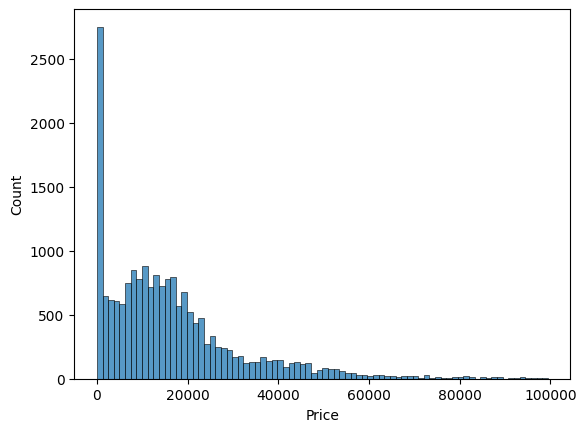

In [49]:
sns.histplot(data['Price'][data['Price'] < 100000])

plt.title = 'Price'


In [50]:
## Log transformation
log_price = np.log1p(data['Price'])

<Axes: xlabel='Price', ylabel='Count'>

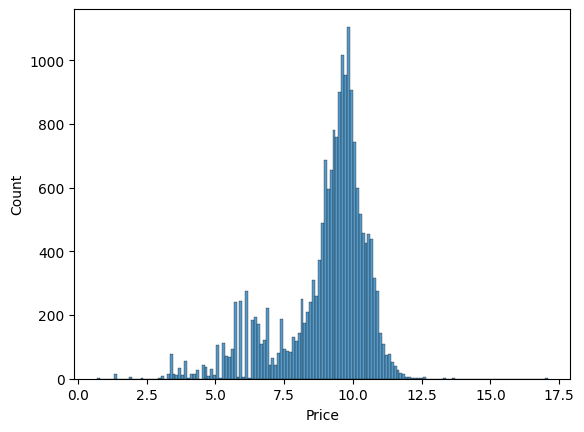

In [51]:
sns.histplot(log_price)

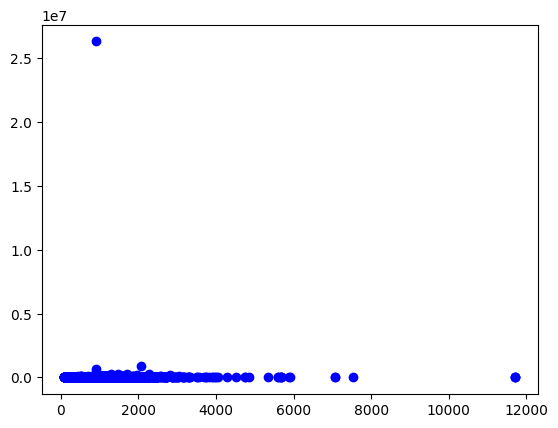

In [52]:
## plot a scatter diage b/n KM and price
plt.scatter(data['Levy'], data['Price'], c='blue')

TypeError: 'str' object is not callable

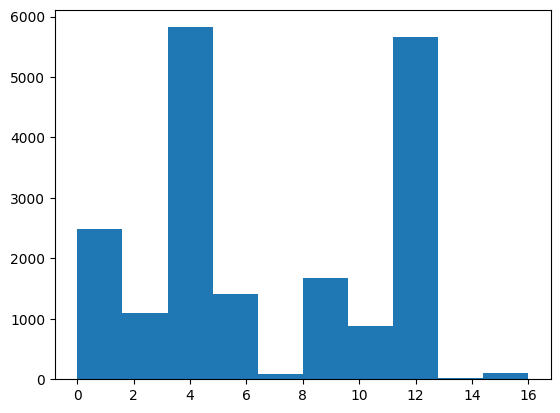

In [53]:
plt.hist(data['Airbags'], bins=10)

plt.title('Histogram Distribution of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')

plt.show()

In [ ]:
plt.hist(data['Price'])

plt.show()

In [ ]:
## scatter plot b/n Age and Price
sns.scatterplot(data=data, x='Airbags', y='Price', hue='Mileage')

plt.title('Correlation b/n KM and Price of car')
plt.xlabel('Airbags')
plt.ylabel('Price')

plt.show()



## Building A Validation Framework / Splitting Dataset

. Training set 60%

. Validation dataset 20%

. Test dataset 20%

In [ ]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)

df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=11)

print(f'Train set {len(df_train)}')
print(f'Valid set {len(df_valid)}')
print(f'Test set {len(df_test)}')

In [ ]:
## selecting target column and converting it to a vector format
y_train = df_train['Price'].values
y_valid = df_valid['Price'].values
y_test = df_test['Price'].values

In [ ]:
del df_train['Price']
del df_valid['Price']
del df_test['Price']

## Train A Baseline Regression Model
- Selecting baseline features

- Train a regression model

In [ ]:
baseline_features = ['Levy', 'Prod. year', 'Cylinders', 'Airbags']
df_train_bl = df_train[baseline_features]

In [ ]:
X_train_bl = df_train_bl.values
X_train_bl

In [54]:
## lets train model
model = LinearRegression()
model.fit(X_train_bl, y_train)

NameError: name 'X_train_bl' is not defined